# 주로 사용하는 함수 선언

In [53]:
import os
import pandas as pd

# 폰트설정
import matplotlib.font_manager as fm
from matplotlib import rc

rc('font', family=fm.FontProperties(fname='C:/Users/HYUK/AppData/Local/Microsoft/Windows/Fonts/NotoSansKR-Thin.ttf').get_name())


dir_path = "../new_csv/"

# 해당 위치에 존재하는 파일들을 리스트로 반환하는 함수
def get_file_list(directory):
    file_list = []

    # 디렉터리 내의 모든 항목에 대해 반복합니다.
    for item in os.listdir(directory):
        # 전체 경로를 생성합니다.
        item_path = os.path.join(directory, item)

        # 파일인 경우에만 리스트에 추가합니다.
        if os.path.isfile(item_path):
            file_list.append(item)

    return file_list

file_path = get_file_list(dir_path)
print(file_path)

def read_csv(file_path : str, do_print : bool = True ):
    df = pd.read_csv(dir_path+file_path)
    if do_print :
        print(file_path,"\n")
        print("데이터 프레임 구조:", df.shape,"\n")
        print(df.head())
        print("\n데이터 정보 :\n")
        print(df.info())
        print("\nNan 값 존재 데이터")
        print(df[df.isnull().any(axis=1)])
    return df

def save_csv(file_path : str, df : pd.DataFrame, ):
    new_data_path = "../new_csv/new_"+file_path
    
    data_path_os = os.path.dirname(new_data_path)
    if not os.path.exists(data_path_os):
        os.makedirs(data_path_os)

    
    # 데이터 저장
    df.to_csv("../new_csv/new_"+file_path, index=False)

['new_GDP.csv', 'new_경제성장률.csv', 'new_국제_에너지_원자제가격.csv', 'new_미국_Fed_기준금리.csv', 'new_생산자물가지수.csv', 'new_소비자물가지수.csv', 'new_실업률.csv', 'new_원달러_환율.csv', 'new_은행대출금_연체율.csv', 'new_주택매매가격지수.csv', 'new_통화량.csv', 'new_한국은행_기준금리.csv']


# 2)시각화

## 2-1) 한국금리 시각화

In [54]:
df_itr= read_csv("new_한국은행_기준금리.csv")

new_한국은행_기준금리.csv 

데이터 프레임 구조: (306, 2) 

        변환  기준금리
0  1999/05  4.75
1  1999/06  4.75
2  1999/07  4.75
3  1999/08  4.75
4  1999/09  4.75

데이터 정보 :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   변환      306 non-null    object 
 1   기준금리    306 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.9+ KB
None

Nan 값 존재 데이터
Empty DataFrame
Columns: [변환, 기준금리]
Index: []


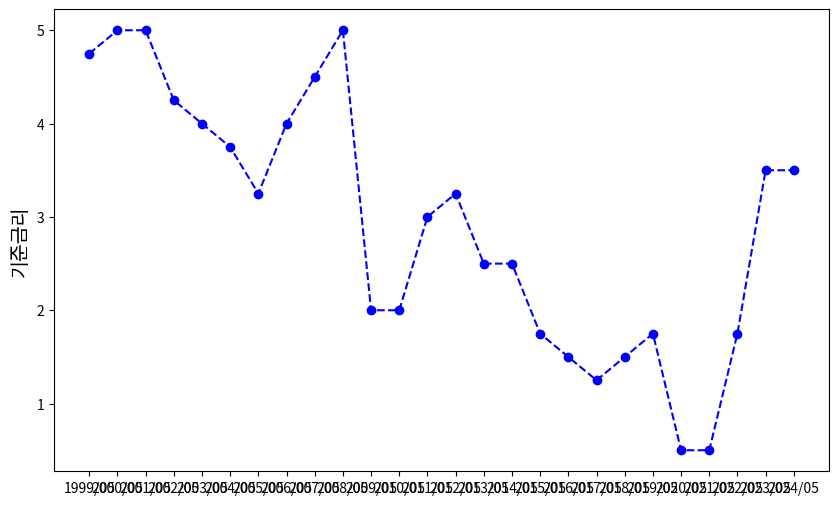

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
df_sampled = df_itr.iloc[::12]
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(df_sampled['변환'], df_sampled[df_sampled.columns[1]], color='b', marker='o', linestyle='--', label='Year-over-Year Change')
ax1.set_ylabel('기준금리', fontsize=14)
ax1.tick_params(axis='y')

In [56]:
# import plotly.express as px
# import pandas as pd

# df_sampled = df_itr

# fig = px.scatter(df_sampled, x = df_sampled.columns[0],
#                  y = df_sampled.columns[1],
#                  title = "기준금리 변화" 
#                  size = 'humidity', color = 'dust')

# import plotly.express as px
# import pandas as pd

# df_sampled = df_itr

# # 변환을 위한 애니메이션 컬럼 추가 (애니메이션의 프레임 역할)
# # df_sampled['Frame'] = range(len(df_sampled))  # 각 데이터 포인트에 프레임 번호 부여

# # Plotly Express로 애니메이션 생성
# fig = px.line(
#     df_sampled, 
#     x='변환',  # x축 데이터: 날짜 또는 시간
#     y=df_sampled.columns[1],  # y축 데이터: 두 번째 컬럼 (기준금리)
#     title="기준금리 변화 애니메이션",  # 그래프 제목
#     markers=True,  # 데이터 포인트에 마커 추가
#     animation_frame='변환',  # 애니메이션 프레임 지정
#     labels={'변환': '날짜', df_sampled.columns[1]: '기준금리'},  # 축 레이블
#     line_dash_sequence=['dash'],  # 점선 스타일
#     color_discrete_sequence=['blue']  # 선 색상 지정
# )

# # 레이아웃 추가 설정 (y축, 폰트 크기 등)
# fig.update_layout(
#     yaxis=dict(title='기준금리', titlefont=dict(size=14)),  # y축 제목과 폰트 크기
#     xaxis=dict(title='날짜', titlefont=dict(size=14)),  # x축 제목과 폰트 크기
#     title=dict(font=dict(size=20))  # 그래프 제목 폰트 크기
# )

# # 그래프 출력
# fig.show()

import plotly.graph_objects as go
import pandas as pd

df_sampled = df_itr

frames = []
for i in range(len(df_sampled)-30):
    frame = go.Frame(
        data=[
            go.Scatter(
                x=df_sampled['변환'][i:i+31],
                y=df_sampled['기준금리'][i:i+31],
                name='기준금리 변화',
                line=dict(color='skyblue', dash='dash'),
                marker=dict(size=10),
                yaxis='y1'
            )
        ],
        name=f"Frame {i}"
    )
    frames.append(frame)

fig = go.Figure(
    data = [
        go.Scatter(
            x=df_sampled['변환'],
            y=df_sampled['기준금리'],
            name='기준금리',
            mode='lines+markers',
            line =dict(color='skyblue', dash='dash'),
            marker=dict(size=10),
            yaxis='y1',
        )
    ],
     layout = go.Layout(
            title="기준금리 데이터",
            xaxis=dict(title="날짜"),
            yaxis=dict(
                title="기준금리"
            ),
            legend = dict(x=0.1, y=1.1),
        ),
        frames=frames
)

fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            showactive=False,
            buttons=[
                dict(
                    label="Play",
                    method="animate",
                    args=[None, dict(frame=dict(duration=500, redraw=True), fromcurrent=True)]
                ),
                dict(
                    label="Pause",
                    method="animate",
                    args=[[None], dict(frame=dict(duration=0, redraw=False), mode="immediate")]
                ),
            ]
        )
    ]
)

fig.show()


## 2-2) all 데이터 시각화
- 타깃 데이터가 null인 값은 상관관계 분석에 의미가 없기에 탈락

In [57]:
dir_path = "../"
df = read_csv("all_data.csv",False)
df.dropna(axis=0, subset=[df.columns[-1]], inplace=True)
print(f"기준금리가 null인 데이터:\n",df[df[df.columns[-1]].isnull()])
print(df.shape)

기준금리가 null인 데이터:
 Empty DataFrame
Columns: [변환, GDP_변동률, 경제성장률, 원유_변동률, 미국금리, 생산자물가지수(PPI)_증감률률, 소비자물가지수(CPI)_변동률, 실업률, 환율_변동율, 기업대출, 가계대출, 신용카드대출, 주택매매가격지수_변동율, 통화량_변동율, 기준금리]
Index: []
(306, 15)


<Axes: >

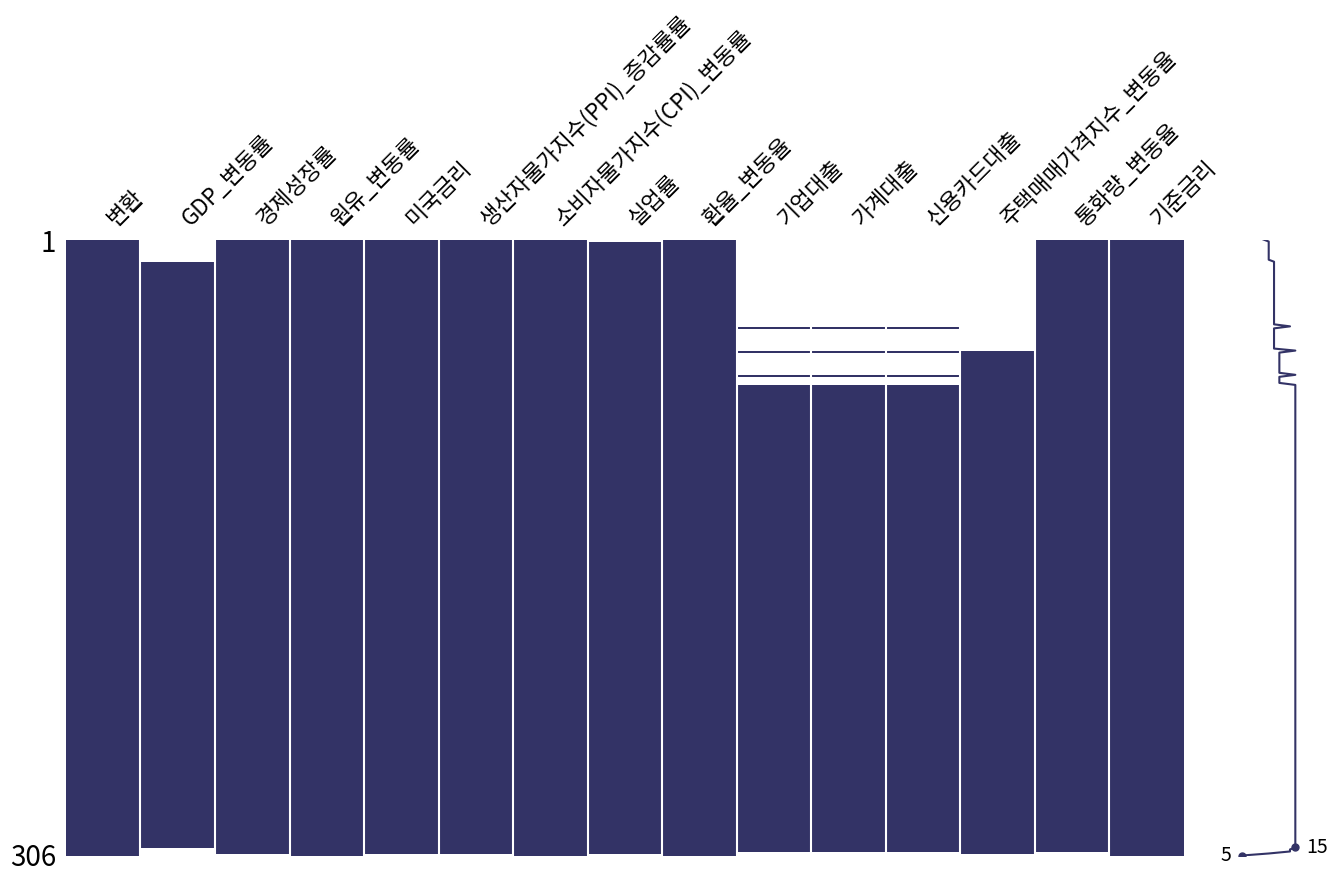

In [58]:
import missingno as msno 
msno.matrix(df=df.iloc[:,:], figsize=(16, 8), color=(0.2,0.2,0.4))

<Axes: >

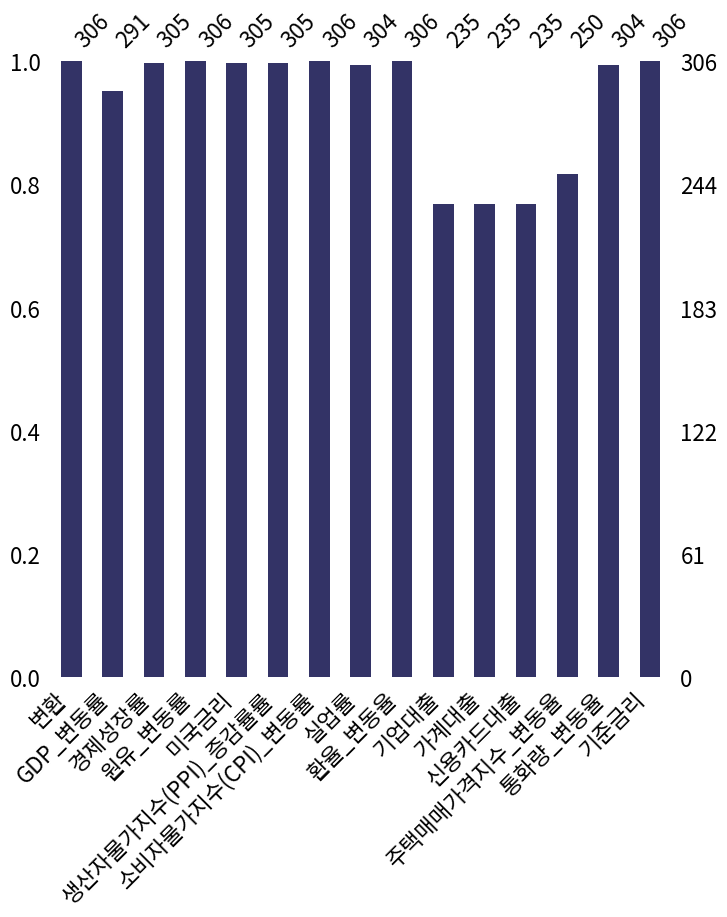

In [59]:
msno.bar(df=df.iloc[:,:], figsize=(8, 8), color=(0.2,0.2,0.4))

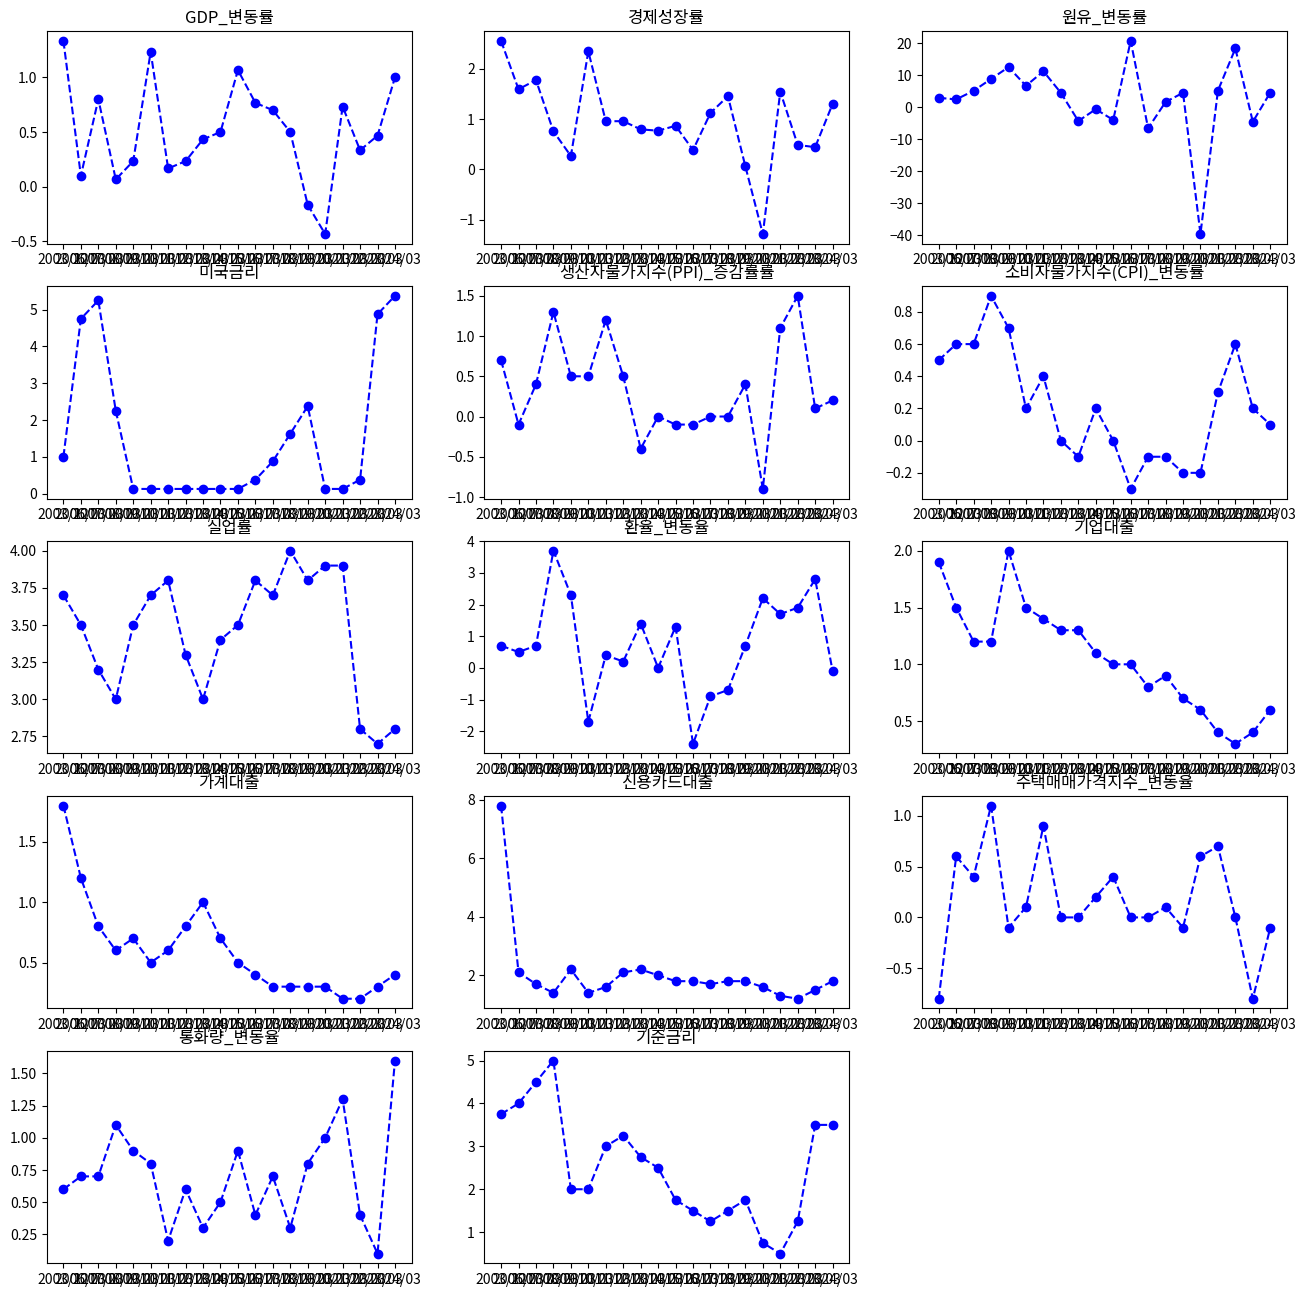

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

df_sampled = df.dropna(how='any')
df_sampled = df_sampled.iloc[::12]

plt.figure(figsize=(16,16))
for i in range(0, len(df_sampled.columns)-1):
    plt.subplot(5,3,i+1)
    plt.title(df_sampled.columns[i+1])
    plt.plot(df_sampled['변환'], df_sampled[df_sampled.columns[i+1]], color='b', marker='o', linestyle='--', label=df_sampled.columns[i+1])
